In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/black-friday-sales-prediction/train.csv')
test = pd.read_csv('/kaggle/input/black-friday-sales-prediction/test.csv')

In [3]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Verificando os tipos dos dados.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Pronto! Já sabemos quais são as variáveis do nosso conjunto de dados e seus tipos. Mas antes de começar a plotar nossos gráficos vamos dar uma olhada no resumo estatístico das nossas variáveis.

In [6]:
# Variáveis numéricas.
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# Variáveis categóricas.
train.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Exploratory Data Analysis (EDA)
Começaremos a nossa análise verificando a distribuição da nossa variável alvo (Purchase).

/tmp/ipykernel_32/2328366249.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Purchase, bins = 25)


Text(0.5, 1.0, 'Distribuição dos valores')

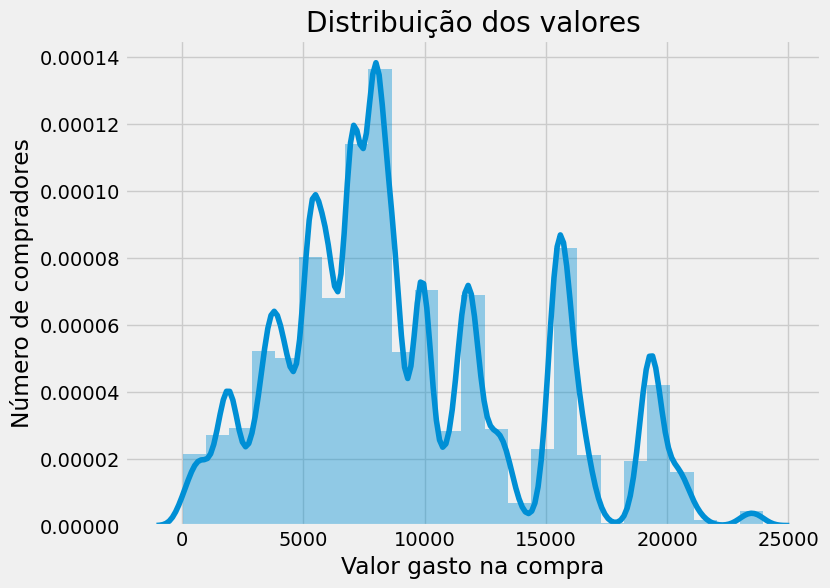

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel('Valor gasto na compra')
plt.ylabel('Número de compradores')
plt.title('Distribuição dos valores')

Até o momento a única informação que temos é que existe uma maior concentração entre os valores de 5000 a 10000 dólares. Seria mais interessante plotarmos um gráfico de boxplot para uma melhor avaliação da distribuição desses dados, além disso podemos facilmente descobrir se temos outliers.

<Axes: >

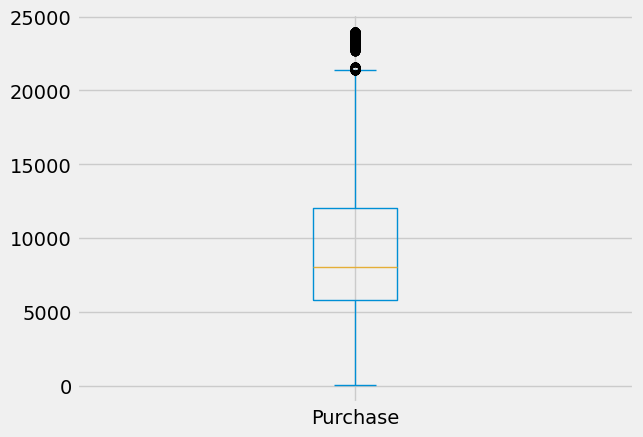

In [9]:
train['Purchase'].plot.box()

Será que temos mais usuários do sexo masculino ou do sexo feminino?

In [10]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

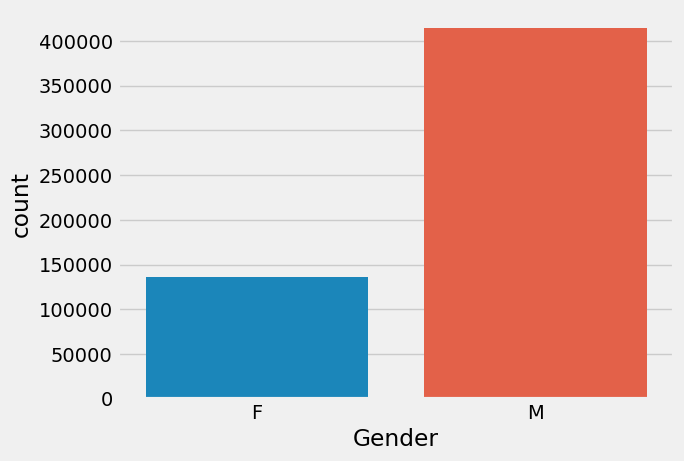

In [11]:
sns.countplot(x='Gender', data=train, order=['F', 'M'])

Qual o valor médio da compra para cada sexo?

In [12]:
train[['Gender','Purchase']].groupby(['Gender'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Gender,
M,9437.526040
F,8734.565765


<Axes: xlabel='Gender', ylabel='Purchase'>

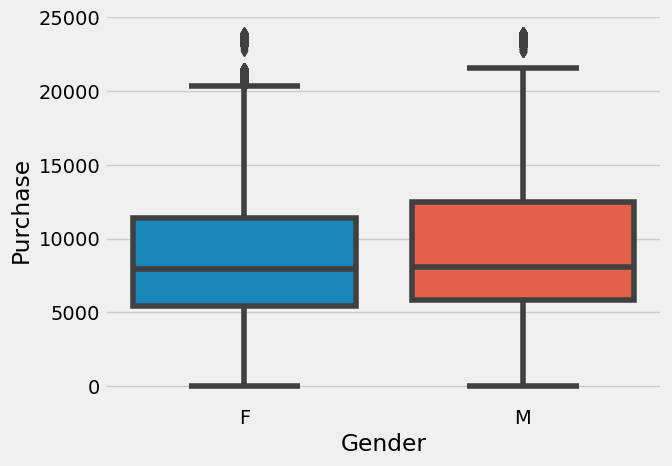

In [15]:
sns.boxplot(x= 'Gender', y='Purchase', data=train)

Qual é a idade predominante entre esses usuários?

In [16]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

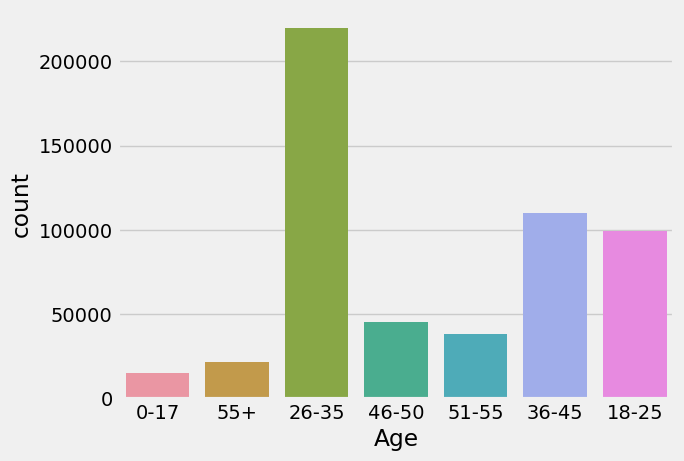

In [19]:
sns.countplot(x='Age', data=train)

Observe que a faixa etária entre os usuários se concentra entre 26 a 30 anos, mais ainda não conseguimos saber se nessa faixa etária temos mais homens ou mulheres. O código a seguir agrupa os dados por sexo e faz a contagem dos registros por faixa etária.

In [20]:
train.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: Age, dtype: int64

Agora sim podemos dizer que temos mais homens que mulheres na faixa etária de 26 a 30 anos.

Qual o valor médio de compra para cada faixa etária?

In [21]:
train[['Age','Purchase']].groupby(['Age'], as_index = True).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


<Axes: xlabel='Age', ylabel='Purchase'>

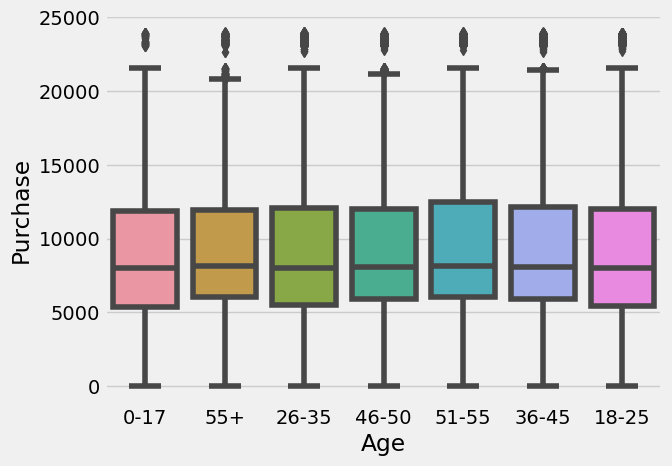

In [23]:
sns.boxplot(x='Age', y= 'Purchase', data=train)

O valor médio da compra está bem distribuido entre as idades, com o valor um pouco menor na faixa etária de 0 a 17 anos.

Vamos observar o número de consumidores por ocupação.

In [24]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

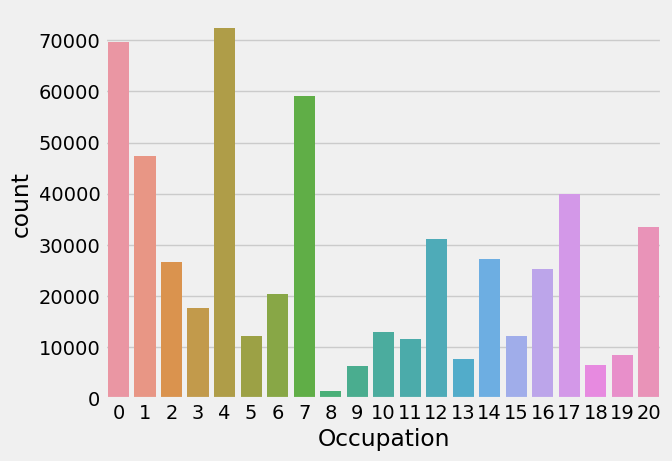

In [25]:
sns.countplot(x= train.Occupation)

In [26]:
train[['Occupation','Purchase']].groupby(['Occupation'], as_index = True).mean().sort_values(by='Purchase',ascending=False)


,Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


<Axes: xlabel='Occupation', ylabel='Purchase'>

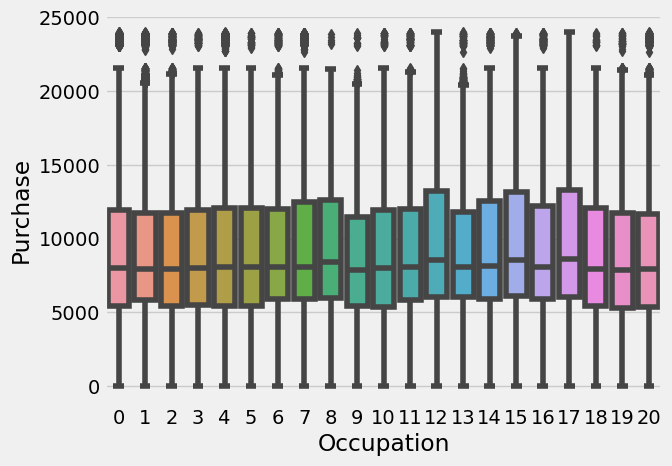

In [28]:
sns.boxplot(x='Occupation', y='Purchase', data=train)

De qual categoria é a cidade com o maior número de usuários?

In [29]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

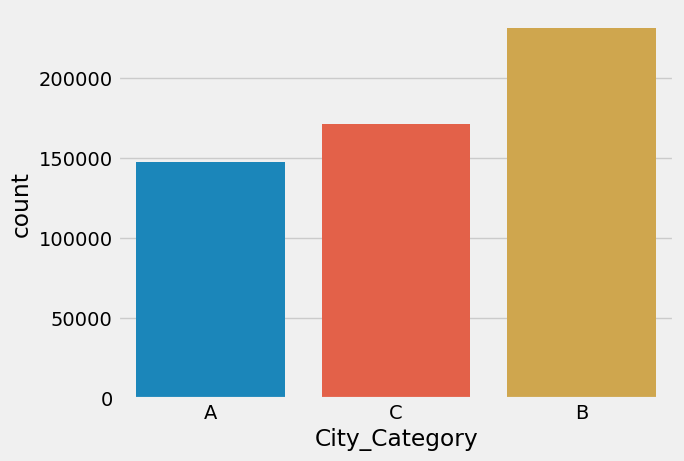

In [30]:
sns.countplot(x=train.City_Category)

Qual a média de compra por cidade?

In [33]:
train[['City_Category','Purchase']].groupby(['City_Category'], as_index=True).mean().sort_values(by='Purchase', ascending=True)


,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


<Axes: xlabel='City_Category', ylabel='Purchase'>

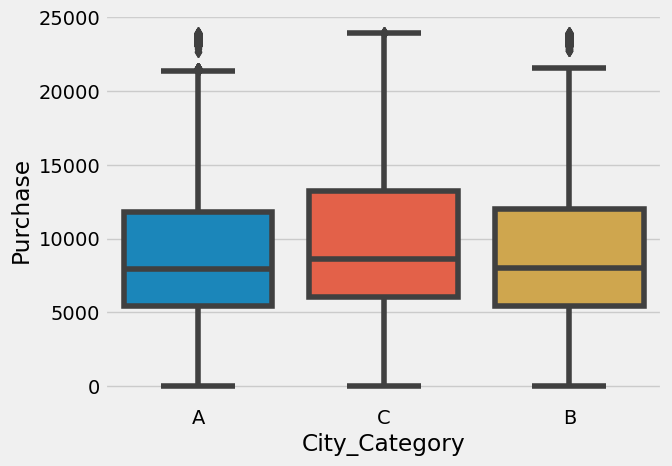

In [34]:
sns.boxplot(x='City_Category', y ='Purchase', data=train)


Chegamos a seguinte conclusão: o maior número de usuários pertence a cidade de categoria B, porém a cidade de categoria C tem o maior valor médio de compra.

In [35]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

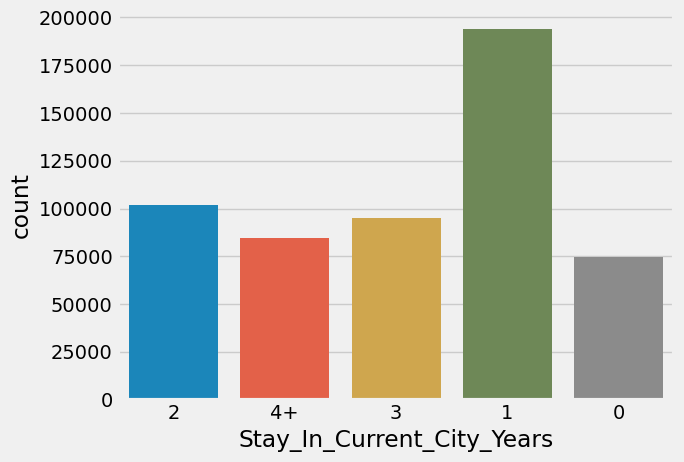

In [36]:
sns.countplot(x=train.Stay_In_Current_City_Years)


Qual a média do valor da compra de acordo com o número de anos que o usuário mora na cidade atual.

In [38]:
train[['Stay_In_Current_City_Years','Purchase']].groupby(['Stay_In_Current_City_Years'], as_index = True).mean().sort_values(by='Purchase',ascending=False)


,Purchase
Stay_In_Current_City_Years,
2,9320.429810
3,9286.904119
4+,9275.598872
1,9250.145923
0,9180.075123


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

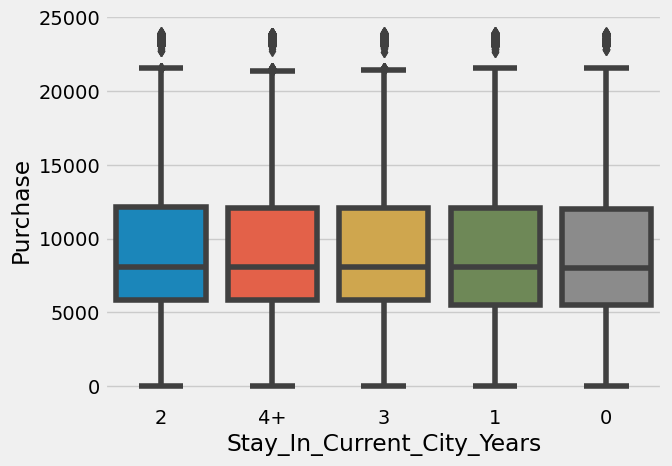

In [41]:
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=train)


Agora queremos saber qual o estado civil dos consumidores.

In [42]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

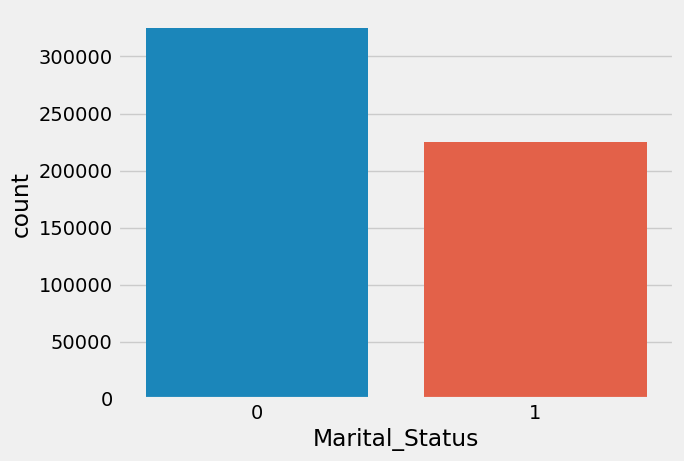

In [44]:
sns.countplot(x=train.Marital_Status)

In [45]:
train[['Marital_Status','Purchase']].groupby(['Marital_Status'], as_index = True).mean().sort_values(by='Purchase',ascending=False)


,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


Qual o valor médio de compra para cada estado civil?

Por default 0 = False e 1 = True, ou seja 0 não é casado e 1 é casado. Dito isso fica claro que os usuários em sua maioria não são casados.

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

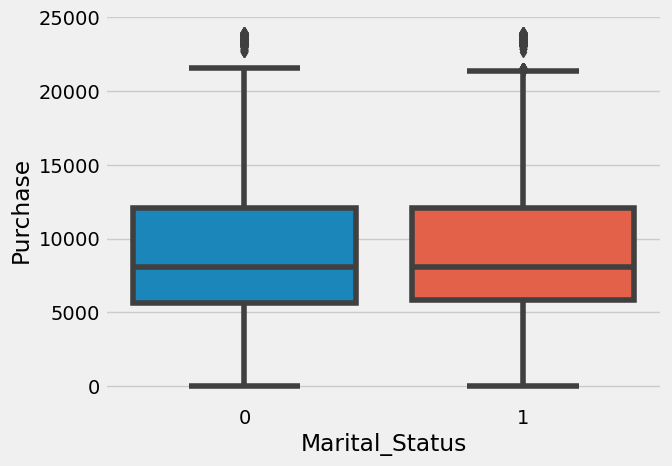

In [47]:
sns.boxplot(x='Marital_Status', y='Purchase', data=train)

In [50]:
train['Product_Category_1'].value_counts(ascending=True)

9        410
17       578
14      1523
19      1603
20      2550
18      3125
7       3721
12      3947
10      5125
13      5549
15      6290
16      9828
4      11753
3      20213
6      20466
2      23864
11     24287
8     113925
1     140378
5     150933
Name: Product_Category_1, dtype: int64

In [51]:
train[['Product_Category_1','Purchase']].groupby(['Product_Category_1'], as_index = True).mean().sort_values(by='Purchase',ascending=True)


,Purchase
Product_Category_1,
19,37.041797
20,370.481176
13,722.400613
12,1350.859894
4,2329.659491
18,2972.864320
11,4685.268456
5,6240.088178
8,7498.958078


<Axes: >

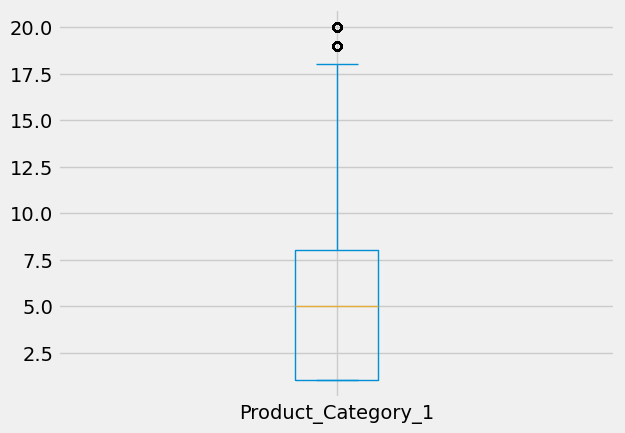

In [52]:
train['Product_Category_1'].plot.box()

Os produtos da categoria 1 que pertencem ao grupo 19 e 20 são outliers.

In [53]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [54]:
train[['Product_Category_2','Purchase']].groupby(['Product_Category_2'], as_index = True).mean().sort_values(by='Purchase',ascending=True)


,Purchase
Product_Category_2,
7.0,6884.683706
12.0,6975.472504
14.0,7105.264916
9.0,7277.006851
11.0,8940.580515
5.0,9027.821574
18.0,9352.440433
17.0,9421.576577
13.0,9683.352388


<Axes: >

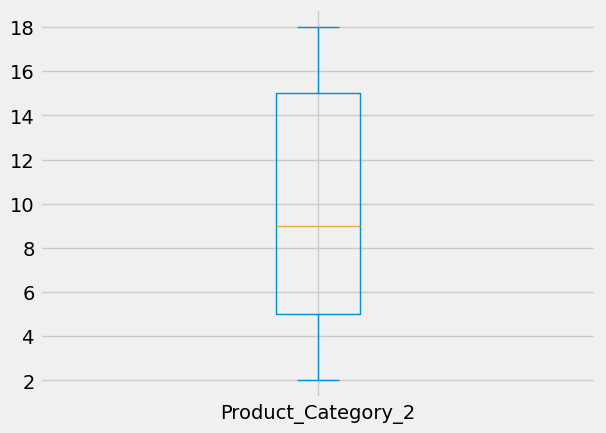

In [55]:
train['Product_Category_2'].plot.box()


Já na categoria 2, temos uma maior quantidade de produtos do grupo 8. Podemos observar também que o produto do grupo 10 teve o maior valor médio de compra.

In [56]:
train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [57]:
train[['Product_Category_3','Purchase']].groupby(['Product_Category_3'], as_index = True).mean().sort_values(by='Purchase',ascending=True)


,Purchase
Product_Category_3,
12.0,8715.512762
4.0,9794.386667
14.0,10052.594530
9.0,10431.697210
18.0,10993.980773
17.0,11769.943001
16.0,11981.890642
11.0,12091.437673
5.0,12117.786889


<Axes: >

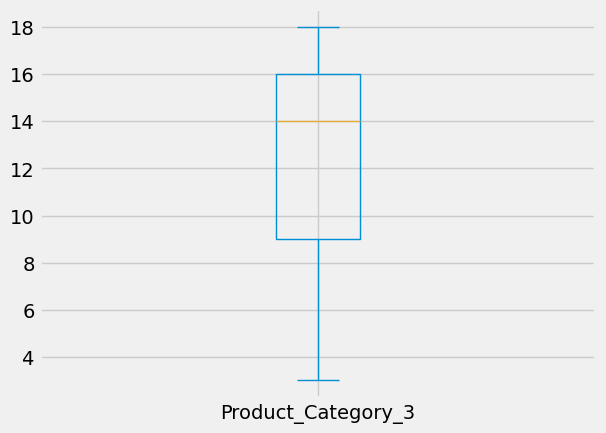

In [58]:
train['Product_Category_3'].plot.box()


Na categoria 3 temos o produto do grupo 3 com a menor quantidade. Dando uma verificada mais detalhada, chegamos a uma informação importante, na categoria 2 e 3 temos um valor médio de compra bem próximo para os produtos do grupo 10.

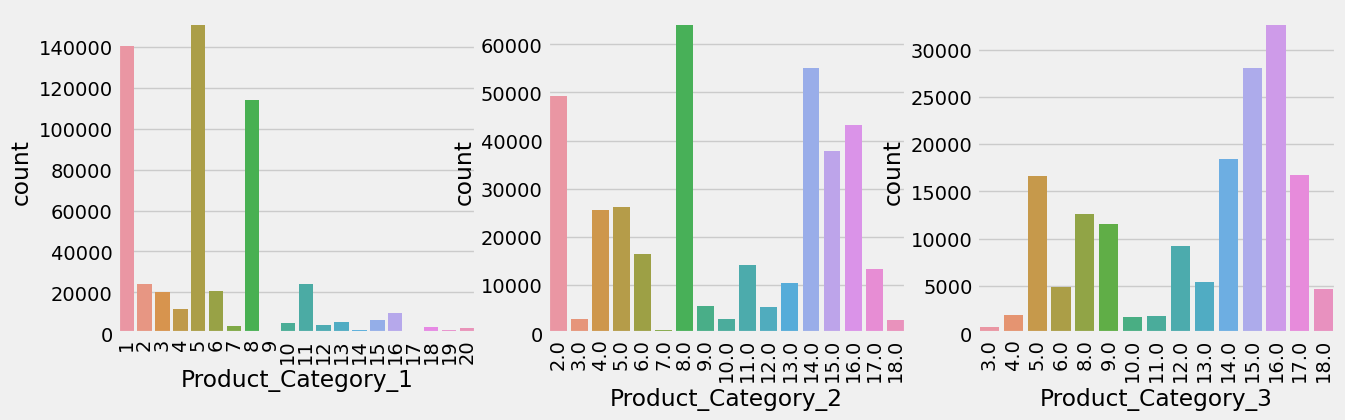

In [61]:
# Distribuição dos valores para cada categoria.
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.countplot(x=train.Product_Category_1)
plt.xticks(rotation=90)

plt.subplot(132)
sns.countplot(x=train.Product_Category_2)
plt.xticks(rotation=90)

plt.subplot(133)
sns.countplot(x=train.Product_Category_3)
plt.xticks(rotation=90)

plt.show()

E por último mais não menos importante, temos a matriz de correlação, que nos possibilita fazer uma análise silmultânea da associação entre as variáveis.

/tmp/ipykernel_32/4117836337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


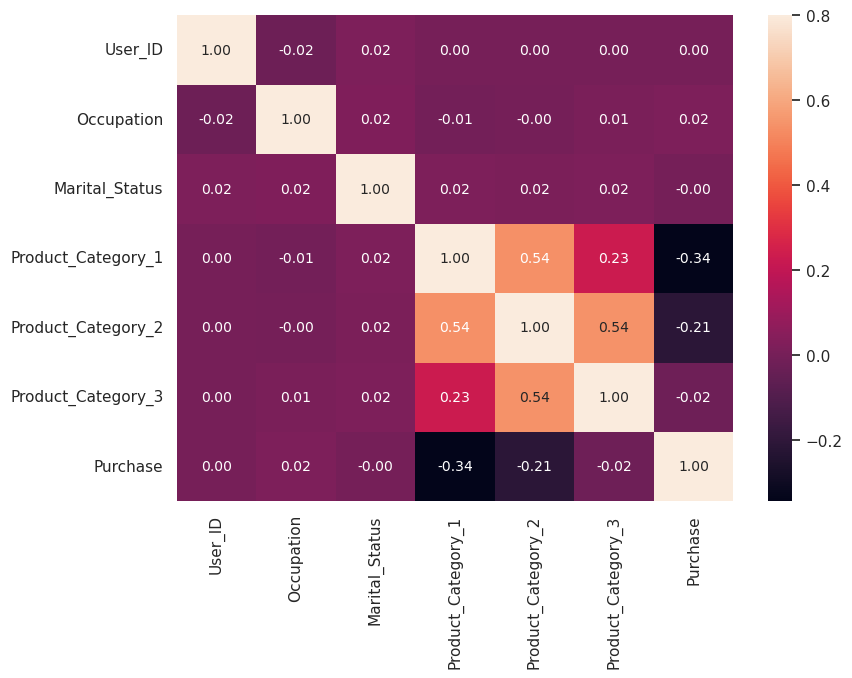

In [62]:
matrix = train.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(matrix, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')
plt.show()

Um ponto importante a se observar é a alta correlação entre a categoria dos produtos. Isso já era esperado uma vez que foi dito que um produto pode pertencer a mais de uma categoria.

Meu objetivo principal foi mostrar como podemos extrair importantes informações através de técnicas estatísticas e visualização de dados. Abaixo vou resumir o que foi descoberto.

A maioria dos usuários é do sexo masculino
Com idade entre 26 a 30 anos
Não são casados
Residem na cidade de categoria B
Moram 1 ano na cidade atual
E compraram mais produtos da categoria 1.